<a href="https://colab.research.google.com/github/ankit-dutta/Blinkit-Analysis/blob/main/Blinkit_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # Importing Raw Data

In [ ]:
df = pd.read_csv("blinkit_data.csv")

Sample Data

In [ ]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [ ]:
print("size of data :", df.shape)

size of data : (8523, 12)


In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [ ]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


# **Data Cleaning**

In [ ]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat',
                                                         'reg':'Regular',
                                                         'low fat':'Low Fat'
                                                         })

In [ ]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


# **Business Requirement**

**KPI's Requirement**

In [ ]:
#Total Sales
total_sales = df["Sales"].sum()

#Average Sales
average_sales = df["Sales"].mean()

# No of Item sold
no_of_item_sold = df["Sales"].count()

#Average Ratings
avg_rating = df['Rating'].mean()

# Display

print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales: ${average_sales:,.1f}")
print(f"No of Items Sold: {no_of_item_sold:,.0f}")
print(f"Average Rating: {avg_rating:,.1f}")

Total Sales: $1,201,681.5
Average Sales: $141.0
No of Items Sold: 8,523
Average Rating: 4.0


# **Charts**

# **Total Sales by Fat Content**

<function matplotlib.pyplot.show(close=None, block=None)>

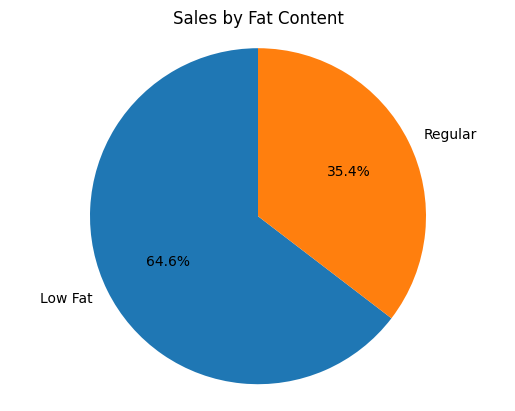

In [ ]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.1f%%', startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show

# **Total sales by Item Type**

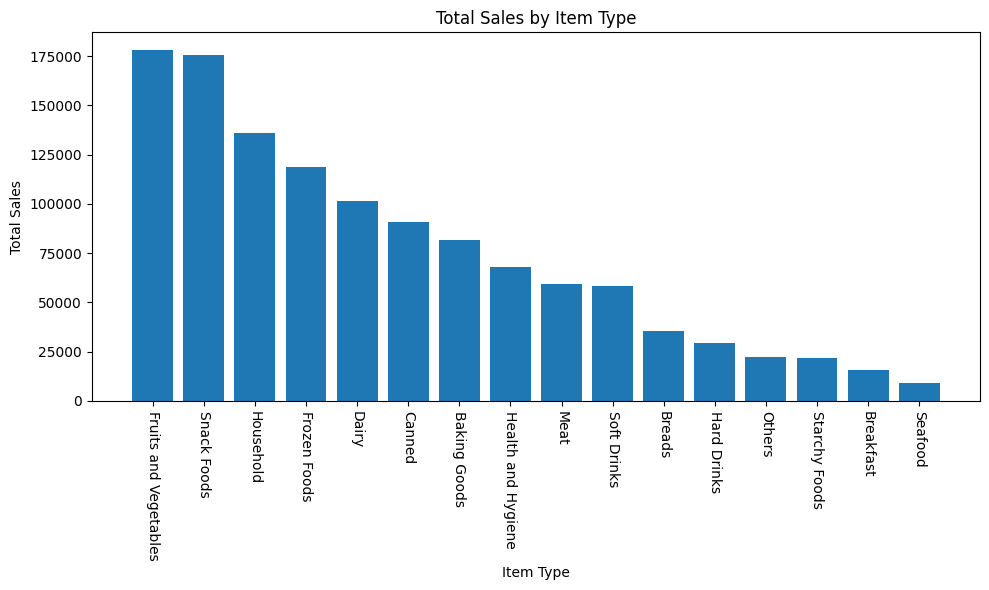

In [ ]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation = -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

plt.tight_layout()
plt.show()

# **Fat Content by Outlet for Total Sales**

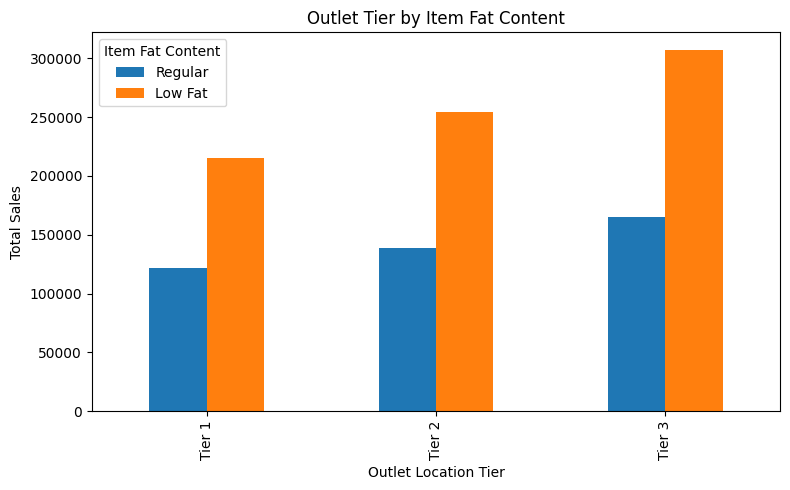

In [ ]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = 'bar', figsize = (8, 5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

## **Sales by Outlet Size**

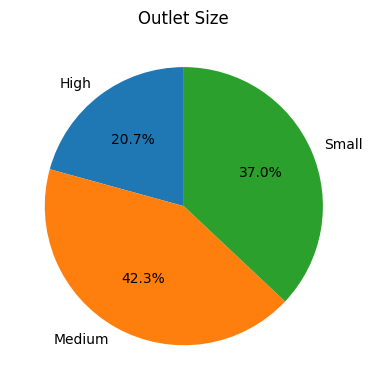

In [ ]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize = (4, 4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct='%1.1f%%', startangle = 90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()
